<a href="https://colab.research.google.com/github/rfajri27/a443-MLOps/blob/main/latihan_python_clean_code/starter/eda_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Latihan Refactoring Code

Dataset yang digunakan pada project ini merupakan dataset [Telco Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn). 


## Menyiapkan Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

## Menyiapkan Dataset

In [ ]:
df = pd.read_csv('/content/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,StreamingTV,PhoneService,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,tenure,Churn
0,7590-VHVEG,Female,0,Yes,No,No,DSL,Yes,29.85,29.85,1,No
1,5575-GNVDE,Male,0,No,No,Yes,DSL,No,56.95,1889.5,34,No
2,3668-QPYBK,Male,0,No,No,Yes,DSL,Yes,53.85,108.15,2,Yes
3,7795-CFOCW,Male,0,No,No,No,DSL,No,42.30,1840.75,45,No
4,9237-HQITU,Female,0,No,No,Yes,Fiber optic,Yes,70.70,151.65,2,Yes


In [ ]:
# Memfilter data yang memiliki nilai ' '

df = df[df['TotalCharges'] != ' ']
df['TotalCharges'] = df.TotalCharges.astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
categorical_columns = [
    'gender',
    'SeniorCitizen',
    'Partner',
    'StreamingTV',
    'PhoneService',
    'InternetService',
    'PaperlessBilling',
    'Churn'
]
numerical_columns = ['MonthlyCharges', 'TotalCharges', 'tenure']

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
StreamingTV         0
PhoneService        0
InternetService     0
PaperlessBilling    0
MonthlyCharges      0
TotalCharges        0
tenure              0
Churn               0
dtype: int64

In [ ]:
df.describe()

,SeniorCitizen,MonthlyCharges,TotalCharges,tenure
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,64.798208,2283.300441,32.421786
std,0.368844,30.085974,2266.771362,24.545260
min,0.000000,18.250000,18.800000,1.000000
25%,0.000000,35.587500,401.450000,9.000000
50%,0.000000,70.350000,1397.475000,29.000000
75%,0.000000,89.862500,3794.737500,55.000000
max,1.000000,118.750000,8684.800000,72.000000


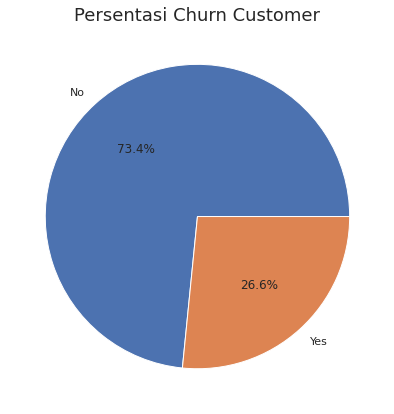

In [ ]:
labels = ['No', 'Yes']
churn = df.Churn.value_counts()

plt.figure(figsize=(7, 7))
plt.pie(churn, labels=labels, autopct='%1.1f%%')
plt.title('Persentasi Churn Customer', loc='center', fontsize=18)
plt.show()


In [ ]:
numerical_columns

['MonthlyCharges', 'TotalCharges', 'tenure']

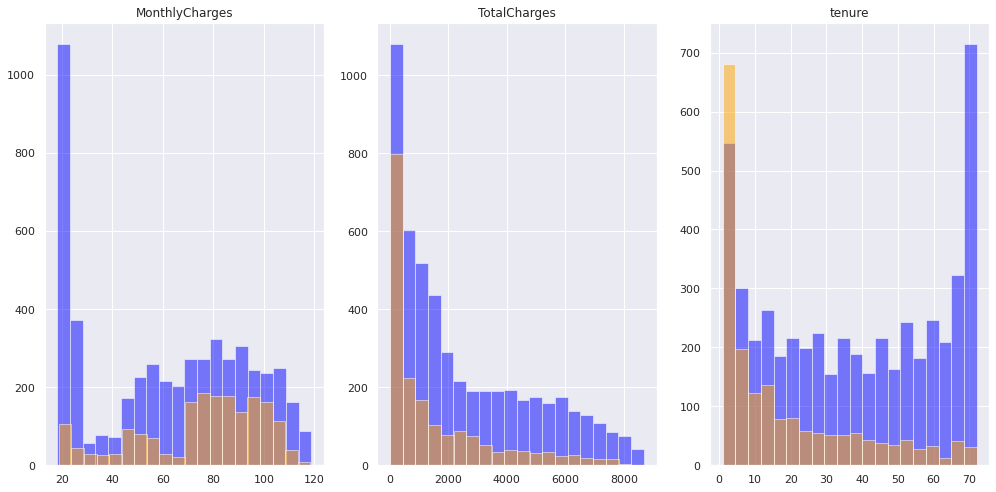

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14, 7))
df[df.Churn == 'No'][numerical_columns].hist(bins=20,
                                                    color='blue',
                                                    alpha=0.5,
                                             ax=ax)
df[df.Churn == 'Yes'][numerical_columns].hist(bins=20,
                                                    color='orange',
                                                    alpha=0.5,
                                                    ax=ax)

plt.tight_layout()
plt.show()

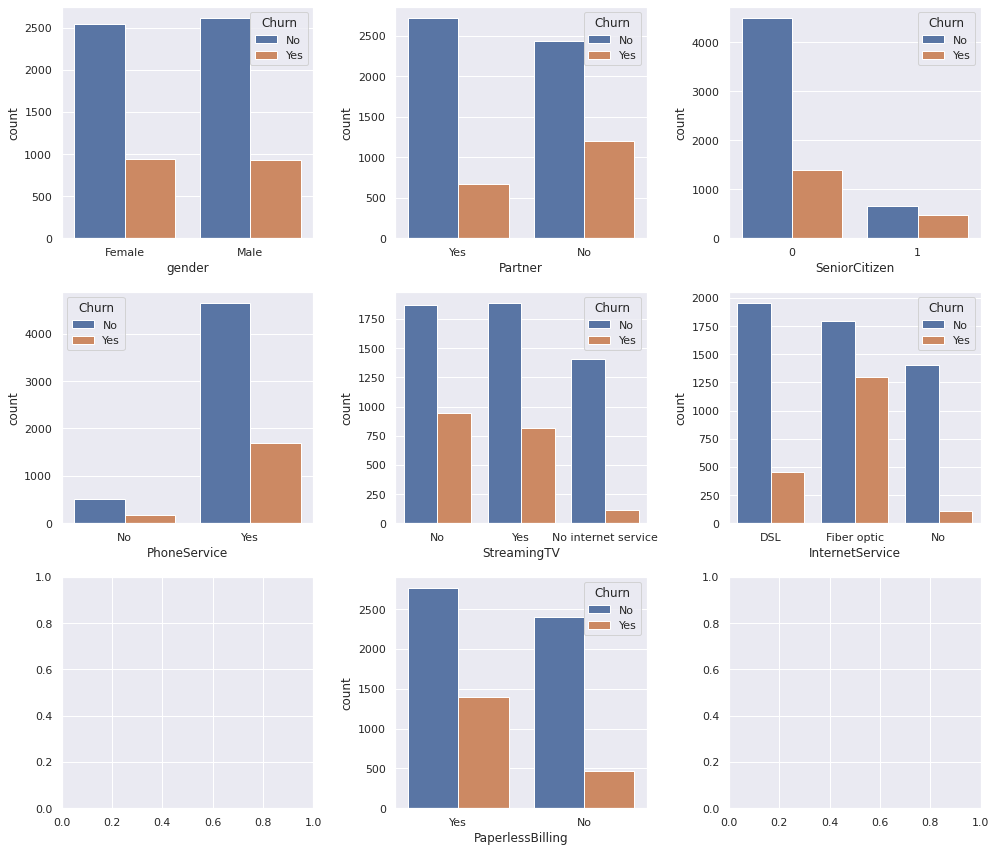

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()


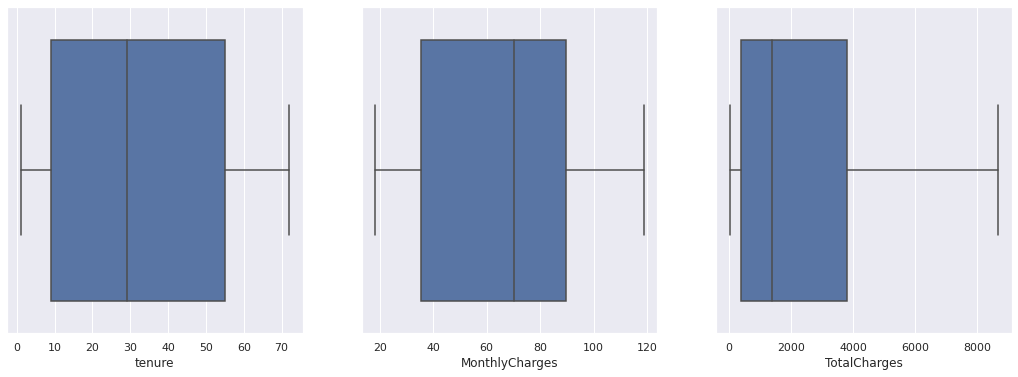

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(x=df['tenure'], ax=ax[0])
sns.boxplot(x=df['MonthlyCharges'], ax=ax[1])
sns.boxplot(x=df['TotalCharges'], ax=ax[2])
plt.show()